# Clasifiación supervisada a la imagen del 10-04-2020

In [2]:
import ee 
ee.Initialize()

# Zona de estudio 

In [3]:
zona= ee.FeatureCollection('users/egonzalezllamas/geom2')

In [4]:
import geemap
Map= geemap.Map(basemap='HYBRID')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [6]:
geom= zona.geometry()

In [7]:
Map.centerObject(geom,11)

In [8]:
Map.addLayer(zona,{'color':'green'},name= 'Zona de Estudio')

In [9]:
#Seleccionar una imagen Landsat 8

imagen= ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_029046_20200410')\
.select(['B2','B3','B4','B5','B6','B7'],['BLUE','GREEN','RED','NIR','SWIR1','SWIR2'])\
.multiply(0.0001)\
.clip(zona)\
.reproject(crs='EPSG:3857',scale= 30)
                
                    

In [8]:
#Nombre de las bandas

imagen.bandNames().getInfo()

['BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2']

In [10]:
#Simbologia a escala 0 - 1
vis= {
    'bands': ['SWIR1','NIR','RED'],
    'min': 0.1,
    'max': 0.6, 
    'gamma': 1.6
}

In [11]:
Map.addLayer(imagen,vis,name='Landsat 8 RS')
Map

Map(bottom=232041.0, center=[20.42898240347639, -103.11465621302564], controls=(WidgetControl(options=['positi…

In [12]:
Agua= (Map.user_rois).geometry()

In [ ]:
#Agua.getInfo()["coordinates"]

In [13]:
features=[]
for i in Agua.getInfo()['coordinates']:
    F_agua= ee.Feature(ee.Geometry.Point(i),{'Clase':1, 'Cobertura':'Agua'})
    features.append(F_agua)

In [14]:
len(features)

172

In [15]:
Bosque= (Map.user_rois).geometry()

In [16]:
for i in Bosque.getInfo()['coordinates']:
    F_bosque= ee.Feature(ee.Geometry.Point(i),{'Clase':2, 'Cobertura':'Bosque'})
    features.append(F_bosque)

In [17]:
len(features)

262

In [18]:
Pastizal= (Map.user_rois).geometry()

In [19]:
for i in Pastizal.getInfo()['coordinates']:
    F_pastizal= ee.Feature(ee.Geometry.Point(i),{'Clase':3, 'Cobertura':'Pastizal'})
    features.append(F_pastizal)

In [20]:
len(features)

369

In [21]:
Suelo= (Map.user_rois).geometry()

In [22]:
for i in Suelo.getInfo()['coordinates']:
    F_suelo= ee.Feature(ee.Geometry.Point(i),{'Clase': 4, 'Cobertura':'Suelo'})
    features.append(F_suelo)

In [23]:
len(features)

447

In [24]:
Urbano= (Map.user_rois).geometry()

In [25]:
for i in Urbano.getInfo()['coordinates']:
    F_urbano= ee.Feature(ee.Geometry.Point(i),{'Clase':5,'Cobertura':'Urbano'})
    features.append(F_urbano)

In [26]:
len(features)

598

# Fase de entrenamiento

In [27]:
len(features)

598

In [28]:
# ROI de entrenamiento

ROI= ee.FeatureCollection(features) 

In [43]:
Map.addLayer(ROI,{'color':'red'}, 'ROI')
Map

Map(bottom=116320.0, center=[20.236428815882984, -103.06543476645268], controls=(WidgetControl(options=['posit…

In [30]:
#Crear random aleatorio en un campo random
samples= ROI.randomColumn('random',2000)

In [31]:
# Obtener un FeatureCollection de datos ROI
set_datos = imagen.sampleRegions(collection = samples,
                                 properties = ["Clase","random","Cobertura"],
                                 scale = 30,
                                 projection = None,
                                 tileScale = 1,
                                 geometries = True)

In [32]:
Suelo

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Collection.geometry",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection",
          "arguments": {
            "features": {
              "arrayValue": {
                "values": [
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Point",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  -103.250558,
                                  20.157136
                                ]
                              }
                            }
                          }
                        }
                      }
                    }
                  },
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Point",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  -103.245663,
                                  20.159835
                                ]
                              }
                            }
                          }
                        }
                      }
                    }
                  },
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Point",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  -103.256053,
                                  20.159191
                                ]
                              }
                            }
                          }
                        }
                      }
                    }
                  },
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Point",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  -103.246694,
                                  20.15202
                                ]
                              }
                            }
                          }
                        }
                      }
                    }
                  },
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Point",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  -103.242315,
                                  20.160319
                                ]
              

In [72]:
# Separar datos entrenamiento y validacion
split = 0.5  # Aproximadamente 80% de Entrenamiento, 20% de validacion
training = set_datos.filter(ee.Filter.lt('random', split))
testing = set_datos.filter(ee.Filter.gte('random', split))

# Extraer datos obtenidos

In [73]:
import os 

ruta= 'C:/Users/egonz/Documents/PR2_2/Cambio de cobertura/Resultado'
os.chdir(ruta) #Carpeta que guarda los resultados
os.getcwd() #Imprime la ruta completa

'C:\\Users\\egonz\\Documents\\PR2_2\\Cambio de cobertura\\Resultado'

In [74]:
testing;

In [75]:
# Exportar shp

# # Datos ROI completos 

geemap.ee_to_shp(set_datos,
                 filename= 'ROI_completo.shp')
# Datos ROI entrenamiento
geemap.ee_to_shp(training,
                filename= 'ROI_entrenamiento.shp')
# Datos ROI validacion 
geemap.ee_to_shp(testing,
                filename= 'ROI_validacion.shp')

Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_completo.shp
Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_entrenamiento.shp
Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_validacion.shp


# Parametros de clasificacion para Random Forest

In [76]:
#Seleccionar bandas
bandas_sel= ['BLUE','GREEN','RED','NIR','SWIR1','SWIR2']

In [77]:
#Clasificacion de la imagen 

classifier= ee.Classifier.smileRandomForest(100).train(training,'Clase',bandas_sel);

# Aplicar clasificacion

In [78]:
clasf_RF= imagen.classify(classifier)
#plt.savefig('output.tif', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.0)

In [79]:
#Añadir una simbologia a cada clasificación 

vis_clas= {
    'palette':['blue','green','#08e723','red'],
    'min':1,
    'max':4
}

In [80]:
Map.addLayer(clasf_RF,vis_clas,name= 'Clasificacion Final')
Map

Map(bottom=3705708.0, center=[20.52736095941086, -103.08192097338461], controls=(WidgetControl(options=['posit…

# Obtencion de los atributos 

In [81]:
df= geemap.ee_to_pandas(set_datos)
df.head()

,random,Cobertura,Clase,RED,BLUE,NIR,GREEN,SWIR1,SWIR2
0,0.774749,Agua,1,0.0763,0.0742,0.0309,0.1013,0.0214,0.0185
1,0.121697,Agua,1,0.0819,0.0779,0.0335,0.1022,0.0242,0.0207
2,0.467120,Agua,1,0.0779,0.0741,0.0307,0.0986,0.0219,0.0189
3,0.413085,Agua,1,0.0797,0.0743,0.0319,0.0998,0.0223,0.0192
4,0.695886,Agua,1,0.0782,0.0745,0.0308,0.1018,0.0214,0.0189


In [82]:
df.tail()

,random,Cobertura,Clase,RED,BLUE,NIR,GREEN,SWIR1,SWIR2
593,0.650880,Urbano,5,0.2314,0.1712,0.2425,0.2445,0.3874,0.4359
594,0.303102,Urbano,5,0.3260,0.2608,0.3208,0.2992,0.5172,0.5312
595,0.594630,Urbano,5,0.3230,0.2650,0.3011,0.2822,0.5260,0.5005
596,0.038808,Urbano,5,0.2633,0.1953,0.2674,0.2425,0.4391,0.3954
597,0.818462,Urbano,5,0.3633,0.3078,0.3529,0.3619,0.4894,0.5202


In [83]:
df.to_csv('Cobertura_ROI.csv')

# Matriz de error

In [84]:
validation = testing.classify(classifier);
errorMatrix = validation.errorMatrix('Clase', 'classification');

In [85]:
Matriz = errorMatrix.getInfo()
Matriz

[[0, 0, 0, 0, 0, 0],
 [0, 77, 0, 0, 0, 0],
 [0, 0, 47, 0, 0, 0],
 [0, 0, 0, 55, 0, 0],
 [0, 0, 0, 0, 42, 1],
 [0, 0, 0, 0, 4, 68]]

In [86]:
import numpy as np
import pandas as pd

In [87]:
trainCM = pd.DataFrame(np.asarray(Matriz), 
                       index=['Eliminar','Agua', 'Bosque', 'Pastizal', 'Suelo','Urbano'], 
                       columns=['Eliminar','Agua', 'Bosque', 'Pastizal', 'Suelo','Urbano'])
trainCM

,Eliminar,Agua,Bosque,Pastizal,Suelo,Urbano
Eliminar,0,0,0,0,0,0
Agua,0,77,0,0,0,0
Bosque,0,0,47,0,0,0
Pastizal,0,0,0,55,0,0
Suelo,0,0,0,0,42,1
Urbano,0,0,0,0,4,68


In [88]:
# Eliminar columna por etiqueta
trainCM_1 = trainCM.drop(labels = ["Eliminar"], axis = 1)

In [89]:
trainCM_2 = trainCM_1.drop(labels = ["Eliminar"], axis = 0)
trainCM_2

,Agua,Bosque,Pastizal,Suelo,Urbano
Agua,77,0,0,0,0
Bosque,0,47,0,0,0
Pastizal,0,0,55,0,0
Suelo,0,0,0,42,1
Urbano,0,0,0,4,68


In [58]:
import matplotlib.pyplot as plt

In [59]:
import seaborn as sbn

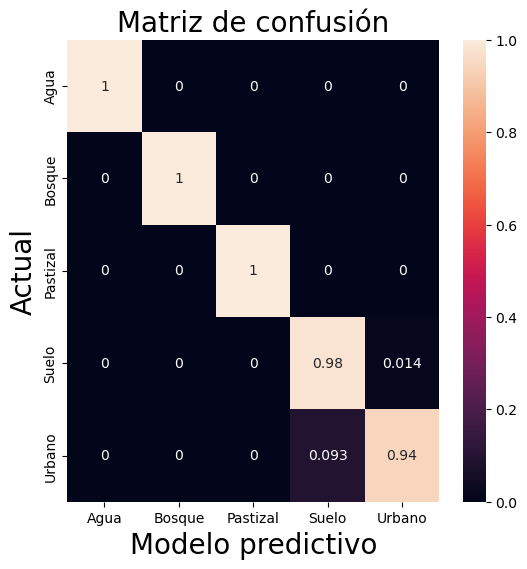

In [90]:
fig, ax= plt.subplots(1, figsize= (6,6))
sbn.heatmap(trainCM_2/trainCM_2.sum(axis=1),annot= True)
ax.set_xlabel('Modelo predictivo',fontsize=20)
ax.set_ylabel('Actual',fontsize=20)
plt.title('Matriz de confusión',fontsize=20);

In [91]:
# precisión de la clasificación
print('Exactitud General:', errorMatrix.accuracy().getInfo());
print('Indice Kappa:', errorMatrix.kappa().getInfo())

Exactitud General: 0.9829931972789115
Indice Kappa: 0.9784858108800327


# Presición de consumidor y productor

In [92]:
print('La presición del productor es: ', errorMatrix.consumersAccuracy().getInfo());
print('La presición del consumidor es: ', errorMatrix.producersAccuracy().getInfo());

La presición del productor es:  [[0, 1, 1, 1, 0.9130434782608695, 0.9855072463768116]]
La presición del consumidor es:  [[0], [1], [1], [1], [0.9767441860465116], [0.9444444444444444]]


# Exportar resultados finales

In [93]:
task = ee.batch.Export.image.toDrive(image=clasf_RF,
                                     description='Imagen Clasificada_V2',
                                     scale=30,
                                     region=geom,
                                     fileNamePrefix='my_export_jalisco2',
                                     crs='EPSG:3857',
                                     fileFormat='GeoTIFF')
task.start()

In [95]:
task.status()

{'state': 'READY',
 'description': 'Imagen Clasificada_V2',
 'creation_timestamp_ms': 1685557231627,
 'update_timestamp_ms': 1685557231627,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': 'FCRKKZCA4XGVDF5YEEZNHTF2',
 'name': 'projects/earthengine-legacy/operations/FCRKKZCA4XGVDF5YEEZNHTF2'}

# Clasficación supervisada a la imagen del 21-05-2000

In [114]:
imagen2

In [12]:
#Seleccionar una imagen Landsat 7

imagen2= ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_029046_20000411')\
.select(['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B7'],['BLUE','GREEN','RED','NIR','SWIR1','SWIR2'])\
.multiply(0.0000275).add(-0.15)\
.clip(zona)\
.reproject(crs='EPSG:3857',scale= 30)

In [13]:
#Simbologia a escala 0 - 1
vis2= {
    'bands': ['SWIR2','NIR','GREEN'],
    'min': 0.1,
    'max': 0.6, 
    'gamma': 1.6
}

In [14]:
Map.addLayer(imagen2,vis2,name='Landsat 7 RS')
Map

Map(bottom=232041.0, center=[20.42898240347639, -103.11465621302564], controls=(WidgetControl(options=['positi…

In [15]:
Agua2= (Map.user_rois).geometry()

In [16]:
features2=[]
for i in Agua2.getInfo()['coordinates']:
    F_agua2= ee.Feature(ee.Geometry.Point(i),{'Clase':1, 'Cobertura':'Agua'})
    features2.append(F_agua2)

In [17]:
len(features2)

119

In [18]:
Bosque2= (Map.user_rois).geometry()

In [19]:
for i in Bosque2.getInfo()['coordinates']:
    F_bosque2= ee.Feature(ee.Geometry.Point(i),{'Clase':2, 'Cobertura':'Bosque'})
    features2.append(F_bosque2)

In [20]:
len(features2)

197

In [21]:
Pastizal2= (Map.user_rois).geometry()

In [22]:
for i in Pastizal2.getInfo()['coordinates']:
    F_pastizal2= ee.Feature(ee.Geometry.Point(i),{'Clase':3, 'Cobertura':'Pastizal'})
    features2.append(F_pastizal2)

In [23]:
len(features2)

338

In [24]:
Suelo2= (Map.user_rois).geometry()

In [25]:
for i in Suelo2.getInfo()['coordinates']:
    F_suelo2= ee.Feature(ee.Geometry.Point(i),{'Clase':4, 'Cobertura':'Suelo'})
    features2.append(F_suelo2)

In [26]:
len(features2)

444

In [28]:
Urbano2= (Map.user_rois).geometry()

In [29]:
for i in Urbano2.getInfo()['coordinates']:
    F_urbano2= ee.Feature(ee.Geometry.Point(i),{'Clase':5, 'Cobertura':'Urbano'})
    features2.append(F_urbano2)

In [30]:
len(features2)

600

# Fase de entrenamiento

In [31]:
# ROI de entrenamiento

ROI2= ee.FeatureCollection(features2) 

In [32]:
Map.addLayer(ROI2,{'color':'blue'}, 'ROI')
Map

Map(bottom=116301.0, center=[20.260908810382332, -103.12454223632814], controls=(WidgetControl(options=['posit…

In [33]:
#Crear random aleatorio en un campo random
samples= ROI2.randomColumn('random',2000)

In [34]:
# Obtener un FeatureCollection de datos ROI
set_datos2 = imagen2.sampleRegions(collection = samples,
                                 properties = ["Clase","random","Cobertura"],
                                 scale = 30,
                                 projection = None,
                                 tileScale = 1,
                                 geometries = True)

In [36]:
# Separar datos entrenamiento y validacion
split = 0.5  # Aproximadamente 80% de Entrenamiento, 20% de validacion
training2 = set_datos2.filter(ee.Filter.lt('random', split))
testing2 = set_datos2.filter(ee.Filter.gte('random', split))

# Extraer datos obtenidos

In [37]:
import os 

ruta= 'C:/Users/egonz/Documents/PR2_2/Cambio de cobertura/Resultado'
os.chdir(ruta) #Carpeta que guarda los resultados
os.getcwd() #Imprime la ruta completa

'C:\\Users\\egonz\\Documents\\PR2_2\\Cambio de cobertura\\Resultado'

In [38]:
# Exportar shp

# # Datos ROI completos 

geemap.ee_to_shp(set_datos2,
                 filename= 'ROI_completo2.shp')
# Datos ROI entrenamiento
geemap.ee_to_shp(training2,
                filename= 'ROI_entrenamiento2.shp')
# Datos ROI validacion 
geemap.ee_to_shp(testing2,
                filename= 'ROI_validacion2.shp')

Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_completo2.shp
Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_entrenamiento2.shp
Generating URL ...
Please wait ...
Data downloaded to C:\Users\egonz\Documents\PR2_2\Cambio de cobertura\Resultado\ROI_validacion2.shp


# Parametros de clasificacion para Random Forest

In [39]:
#Seleccionar bandas
bandas_sel2= ['BLUE','GREEN','RED','NIR','SWIR1','SWIR2']

In [40]:
#Clasificacion de la imagen 

classifier2= ee.Classifier.smileRandomForest(100).train(training2,'Clase',bandas_sel2);

# Aplicar clasificación

In [41]:
clasf_RF2= imagen2.classify(classifier2)
#plt.savefig('output.tif', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.0)

In [43]:
#Añadir una simbologia a cada clasificación 

vis_clas2= {
    'palette':['blue','green','#08e723','red'],
    'min':1,
    'max':4
}

In [45]:
Map.addLayer(clasf_RF2,vis_clas2,name= 'Clasificacion Final 21-05-2000')
Map

Map(bottom=116074.0, center=[20.65206111092427, -103.08333958892513], controls=(WidgetControl(options=['positi…

# Obtencion de los atributos 

In [47]:
df2= geemap.ee_to_pandas(set_datos2)
df2.head()

,random,Cobertura,Clase,RED,BLUE,NIR,GREEN,SWIR1,SWIR2
0,0.552850,Agua,1,0.162785,0.137843,0.118757,0.153490,0.079598,0.076160
1,0.562765,Agua,1,0.162758,0.140978,0.115348,0.158440,0.077480,0.069588
2,0.551337,Agua,1,0.144003,0.129675,0.097638,0.144882,0.060155,0.058533
3,0.647961,Agua,1,0.159485,0.135780,0.115045,0.153188,0.075170,0.073933
4,0.141671,Agua,1,0.158028,0.139135,0.111663,0.154975,0.075225,0.067360


In [48]:
df2.tail()

,random,Cobertura,Clase,RED,BLUE,NIR,GREEN,SWIR1,SWIR2
595,0.108609,Urbano,5,0.386498,0.293135,0.394170,0.341838,1.652213,1.652213
596,0.433386,Urbano,5,0.371317,0.278203,0.390760,0.322423,0.571573,0.575808
597,0.494381,Urbano,5,0.345440,0.257165,0.373600,0.298057,0.548060,0.556090
598,0.815948,Urbano,5,0.380420,0.288652,0.390760,0.340215,1.652213,1.652213
599,0.137913,Urbano,5,0.334770,0.251115,0.363315,0.294813,0.539508,0.556090


In [49]:
df2.to_csv('Cobertura_ROI_2.csv')

# Matriz de error

In [50]:
validation2 = testing2.classify(classifier2);
errorMatrix2 = validation2.errorMatrix('Clase', 'classification');

In [51]:
Matriz2 = errorMatrix2.getInfo()
Matriz2

[[0, 0, 0, 0, 0, 0],
 [0, 62, 0, 0, 0, 0],
 [0, 0, 46, 0, 0, 0],
 [0, 0, 0, 65, 0, 0],
 [0, 0, 0, 0, 44, 3],
 [0, 0, 0, 0, 2, 82]]

In [52]:
import numpy as np
import pandas as pd

In [54]:
trainCM2 = pd.DataFrame(np.asarray(Matriz2), 
                       index=['Eliminar','Agua', 'Bosque', 'Pastizal', 'Suelo','Urbano'], 
                       columns=['Eliminar','Agua', 'Bosque', 'Pastizal', 'Suelo','Urbano'])
trainCM2

,Eliminar,Agua,Bosque,Pastizal,Suelo,Urbano
Eliminar,0,0,0,0,0,0
Agua,0,62,0,0,0,0
Bosque,0,0,46,0,0,0
Pastizal,0,0,0,65,0,0
Suelo,0,0,0,0,44,3
Urbano,0,0,0,0,2,82


In [55]:
# Eliminar columna por etiqueta
trainCM_12 = trainCM2.drop(labels = ["Eliminar"], axis = 1)

In [57]:
trainCM_22 = trainCM_12.drop(labels = ["Eliminar"], axis = 0)
trainCM_22

,Agua,Bosque,Pastizal,Suelo,Urbano
Agua,62,0,0,0,0
Bosque,0,46,0,0,0
Pastizal,0,0,65,0,0
Suelo,0,0,0,44,3
Urbano,0,0,0,2,82


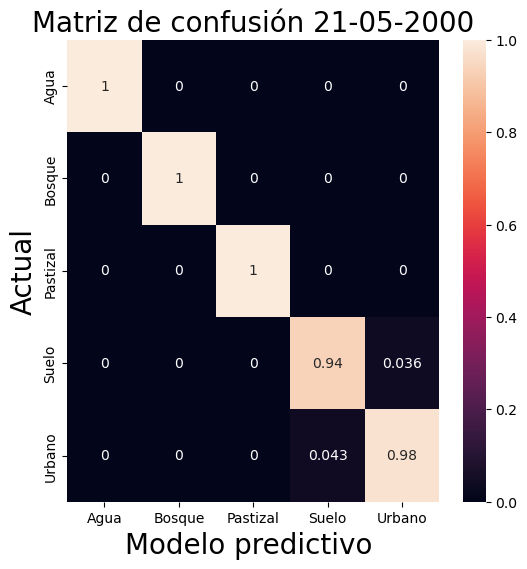

In [60]:
fig, ax= plt.subplots(1, figsize= (6,6))
sbn.heatmap(trainCM_22/trainCM_22.sum(axis=1),annot= True)
ax.set_xlabel('Modelo predictivo ',fontsize=20)
ax.set_ylabel('Actual',fontsize=20)
plt.title('Matriz de confusión 21-05-2000',fontsize=20);

In [61]:
# precisión de la clasificación
print('Exactitud General:', errorMatrix2.accuracy().getInfo());
print('Indice Kappa:', errorMatrix2.kappa().getInfo())

Exactitud General: 0.9835526315789473
Indice Kappa: 0.9791578110216785


# Presición de consumidor y productor

In [63]:
print('La presición del productor es: ', errorMatrix2.consumersAccuracy().getInfo());
print('La presición del consumidor es: ', errorMatrix2.producersAccuracy().getInfo());

La presición del productor es:  [[0, 1, 1, 1, 0.9565217391304348, 0.9647058823529412]]
La presición del consumidor es:  [[0], [1], [1], [1], [0.9361702127659575], [0.9761904761904762]]


# Exportar resultados finales

In [67]:
task2 = ee.batch.Export.image.toDrive(image=clasf_RF2,
                                     description='Imagen Clasificada 21-05-2000',
                                     scale=30,
                                     region=geom,
                                     fileNamePrefix='my_export_21052000',
                                     crs='EPSG:3857',
                                     fileFormat='GeoTIFF')
task2.start()

In [73]:
task2.status()

{'state': 'COMPLETED',
 'description': 'Imagen Clasificada 21-05-2000',
 'creation_timestamp_ms': 1685587747088,
 'update_timestamp_ms': 1685588022502,
 'start_timestamp_ms': 1685587770885,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/'],
 'attempt': 1,
 'batch_eecu_usage_seconds': 277.1457824707031,
 'id': 'SEI7WG6EKB7NMV6XRQW72WNQ',
 'name': 'projects/earthengine-legacy/operations/SEI7WG6EKB7NMV6XRQW72WNQ'}

In [76]:
import folium

# Define the center of our map.
lat, lon = 20.828,-103.411

my_map = folium.Map(location=[lat, lon], zoom_start=10)
my_map

In [77]:
def add_ee_layer(self, ee_image_object, vis_params, name):
    """Adds a method for displaying Earth Engine image tiles to folium map."""
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add Earth Engine drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [80]:
# Select a specific band and dates for land cover.
lc_img = imagen2

# Set visualization parameters for land cover.
vis2= {
    'bands': ['SWIR2','NIR','GREEN'],
    'min': 0.1,
    'max': 0.6, 
    'gamma': 1.6
}

# Create a map.
lat, lon = 20.828,-103.411
my_map = folium.Map(location=[lat, lon], zoom_start=7)

# Add the land cover to the map object.
my_map.add_ee_layer(imagen2, vis2, 'Uso de Suelo')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

In [86]:
import datapane as dp

dp.login(token="bfec7b814783007f9d44e0f1c0ff464717b02de3")

Connected successfully to https://cloud.datapane.com as egonzalezllamas@gmail.com


'egonzalezllamas@gmail.com'

In [88]:
!pip install pyarrow

In [94]:
import geemap.foliumap as geemap

In [152]:
Map1= geemap.Map(center=[20.828,-103.411],zoom= 11)

legend_dict = {
    '1 Agua': 'blue',
    '2 Bosque': 'green',
    '3 Pastizal': '#08e723',
    '4 Suelo': '#FF0000',
    '5 Urbano': 'yellow'
}

imagen= ee.Image('projects/ee-egonzalezllamas/assets/my_export_jalisco2')
imagen2= ee.Image('projects/ee-egonzalezllamas/assets/my_export_21052000')

Map.setCenter(20.828,-103.411,11)
vis_clas2= {
    'palette':['blue','green','#08e723','#FF0000','yellow'],
    'min':1,
    'max':4
}

Map1.add_basemap('HYBRID')

Map1.addLayer(imagen,vis_clas2,'Uso de Suelo 10-04-2020')
Map1.addLayer(imagen2,vis_clas2,'Uso de Suelo 21-05-2000')
Map1.add_legend(legend_dict=legend_dict)
Map1

In [153]:
Map1.publish(
    name='Uso de suelo y cambio de cobertura',
    description='En este mapa se muestra el uso de suelo y cambio de cobertura en Jalisco entre los periodos del 2000-2020',
)

Uploading report and associated data - *please wait...*

Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/BAmwjD7/uso-de-suelo-y-cambio-de-cobertura/' target='_blank'>here</a>.